# Lesson 08 - Linear Regression II
Austin Derrow-Pinion

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [39]:
df = pd.read_csv('./Data/wine_quality_white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [41]:
# 11 features, 1 to predict. 4898 samples
df.shape

(4898, 12)

In [42]:
# store only the feature values
features = df.values[:,:11]
features.shape

(4898, 11)

In [43]:
# store only the quality values
quality = df.quality.values.astype(np.float64)
quality.shape

(4898,)

In [44]:
# scale all values
features_s = scale(features)
quality_s = scale(quality)

In [45]:
# Tensorflow

# y = wx + b
x = tf.constant(features_s, dtype='float32', shape=[4898, 11])
y = tf.constant(quality_s, dtype='float32', shape=[4898, 1])

# weights
w = tf.Variable(tf.truncated_normal([11, 1], stddev = 1))

# biases
b = tf.Variable(0.0)

# error loss function
MSE = tf.reduce_mean(tf.square(tf.matmul(x, w) + b - y))

# define optimizer
STEPSIZE = 0.1
optimizer = tf.train.GradientDescentOptimizer(STEPSIZE).minimize(MSE)

# prediction with current weights
y_pred = tf.matmul(x, w) + b

# init all variables
init = tf.initialize_all_variables()

In [46]:
sess = tf.Session()
sess.run(init)

In [47]:
MAXSTEPS = 1000
for step in range(MAXSTEPS + 1):
    (_, mse, w0, b0) = sess.run([optimizer, MSE, w, b])
    if (step % 100) == 0:
        print('step = %-5d MSE = %-10f' % (step, mse))
print('done!')

step = 0     MSE = 7.053755  
step = 100   MSE = 0.731574  
step = 200   MSE = 0.724004  
step = 300   MSE = 0.720698  
step = 400   MSE = 0.719252  
step = 500   MSE = 0.718620  
step = 600   MSE = 0.718344  
step = 700   MSE = 0.718223  
step = 800   MSE = 0.718170  
step = 900   MSE = 0.718147  
step = 1000  MSE = 0.718137  
done!


In [1]:
# make predictions
quality_s_pred = sess.run(y_pred)

# unstandardize weight predictions
quality_pred = quality_s_pred * quality.std() + quality.mean()

# create new prediction column in dataframe df
df['quality_pred'] = quality_pred
df.head()

NameError: name 'sess' is not defined

In [2]:
# compute mean square error
mse = ((quality - quality_pred.flatten()) ** 2).mean()
print('MSE = ', mse)
print('RMSE = ', np.sqrt(mse))

NameError: name 'quality' is not defined

### Check using sklearn

In [50]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [51]:
LR.fit(features, quality)
quality_pred0 = LR.predict(features)

In [52]:
# compute mean square error
mse = ((quality - quality_pred0.flatten()) ** 2).mean()
print('MSE = ', mse)
print('RMSE = ', np.sqrt(mse))

MSE =  0.563154062989
RMSE =  0.750435915311


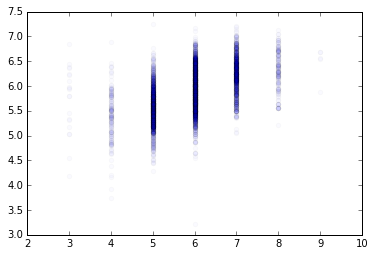

In [53]:
plt.scatter(quality, quality_pred, alpha=0.02)